In [1]:
import os
my_path = r'/home/morgan/Documents/cricket/crickalytics/cricsheets2'

if __name__ == '__main__':
    fileNames = os.listdir(my_path)

In [2]:
import re
yaml_files=[]
pattern = re.compile(r'yaml')
for file in fileNames:
    if pattern.search(file) != None:
        yaml_files.append(file)

In [3]:
import yaml
psl = []
for file in yaml_files:
    opener = open(file)
    psl.append(yaml.load(opener, Loader=yaml.FullLoader))

In [4]:
players = {}
for j in range(len(psl)):
    for i in range(len(psl[j]['innings'][0]['1st innings']['deliveries'])):
        for key in psl[j]['innings'][0]['1st innings']['deliveries'][i]:
            if psl[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'] in players:
                players[psl[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['runs'] = players[psl[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['runs'] + psl[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman']
                if psl[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['extras'] != 0:
                    for extra in psl[j]['innings'][0]['1st innings']['deliveries'][i][key]['extras']:
                        if extra != 'wides' or 'no ball':
                            players[psl[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] = players[psl[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                else:
                    players[psl[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] = players[psl[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                if psl[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'] == 6:
                    players[psl[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['sixes'] = players[psl[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['sixes'] + 1
                for w in psl[j]['innings'][0]['1st innings']['deliveries'][i][key]:
                    if w == 'wicket':
                        if psl[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out'] in players:
                            players[psl[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['dissmisals'] += 1
                        else:
                            players[psl[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']] = {'runs': 0, 'balls': 0, 'sixes': 0, 'dissmisals':1}
            else:
                players[psl[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']] = {'runs': psl[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'], 'balls': 1, 'sixes': 0, 'dissmisals':0}

In [5]:
no2 = []
for i in range(len(psl)):
    try:
        psl[i]['innings'][1]['2nd innings']['deliveries'] 
        pass
    except IndexError:
        no2.append(i)

In [6]:
for j in range(no2[0]):
    for i in range(len(psl[j]['innings'][1]['2nd innings']['deliveries'])):
        for key in psl[j]['innings'][1]['2nd innings']['deliveries'][i]:
            if psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman'] in players:
                players[psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['runs'] = players[psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['runs'] + psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman']
                if psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['extras'] != 0:
                    for extra in psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['extras']:
                        if extra != 'wides' or 'no ball':
                            players[psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] = players[psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                else:
                    players[psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] = players[psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                if psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman'] == 6:
                    players[psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['sixes'] = players[psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['sixes'] + 1
                for w in psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]:
                    if w == 'wicket':
                        if psl[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out'] in players:
                            players[psl[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['dissmisals'] += 1
                        else:
                            players[psl[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']] = {'runs': 0, 'balls': 0, 'sixes': 0, 'dissmisals':1}
            else:
                players[psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']] = {'runs': psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman'], 'balls': 1, 'sixes': 0, 'dissmisals':0}

In [7]:
for n in range(len(no2)-1):
    for j in range(no2[n]+1,no2[n+1]):
        for i in range(len(psl[j]['innings'][1]['2nd innings']['deliveries'])):
            for key in psl[j]['innings'][1]['2nd innings']['deliveries'][i]:
                if psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman'] in players:
                    players[psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['runs'] = players[psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['runs'] + psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman']
                    if psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['extras'] != 0:
                        for extra in psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['extras']:
                            if extra != 'wides' or 'no ball':
                                players[psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] = players[psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                    else:
                        players[psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] = players[psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                    if psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman'] == 6:
                        players[psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['sixes'] = players[psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['sixes'] + 1
                    for w in psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]:
                        if w == 'wicket':
                            if psl[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out'] in players:
                                players[psl[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['dissmisals'] += 1
                            else:
                                players[psl[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']] = {'runs': 0, 'balls': 0, 'sixes': 0, 'dissmisals':1}
                else:
                    players[psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']] = {'runs': psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman'], 'balls': 1, 'sixes': 0, 'dissmisals':0}

In [8]:
for j in range(no2[-1]+1,len(psl)):
    for i in range(len(psl[j]['innings'][1]['2nd innings']['deliveries'])):
        for key in psl[j]['innings'][1]['2nd innings']['deliveries'][i]:
            if psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman'] in players:
                players[psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['runs'] = players[psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['runs'] + psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman']
                if psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['extras'] != 0:
                    for extra in psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['extras']:
                        if extra != 'wides' or 'no ball':
                            players[psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] = players[psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                else:
                    players[psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] = players[psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                if psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman'] == 6:
                    players[psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['sixes'] = players[psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['sixes'] + 1
                for w in psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]:
                    if w == 'wicket':
                        if psl[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out'] in players:
                            players[psl[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['dissmisals'] += 1
                        else:
                            players[psl[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']] = {'runs': 0, 'balls': 0, 'sixes': 0, 'dissmisals':1}
            else:
                players[psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']] = {'runs': psl[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman'], 'balls': 1, 'sixes': 0, 'dissmisals':0}

In [9]:
eps=0.001
for key in players:
    players[key]['average'] = round(players[key]['runs']/(players[key]['dissmisals']+eps),2)
    players[key]['FearFactor'] = round(players[key]['runs']*(players[key]['sixes']+1)/(players[key]['balls']+eps),4)

In [10]:
import numpy as np
FearFactor = np.array([])
total_players = 0
for key in players:
    FearFactor = np.append(FearFactor, key)
    FearFactor = np.append(FearFactor, int(players[key]['FearFactor']))
    FearFactor = np.append(FearFactor, players[key]['average'])
    FearFactor = np.append(FearFactor, int(players[key]['runs']))
    FearFactor = np.append(FearFactor, int(players[key]['balls']))
    total_players += 1
FearFactor=FearFactor.reshape(total_players,5)
FearFactor = FearFactor[FearFactor[:,1].astype('int32').argsort()[::-1]]
FearFactor = np.concatenate((np.arange(1,FearFactor.shape[0]+1).reshape(FearFactor.shape[0],1),FearFactor),axis=1)
np.save('FearFactor.npy', FearFactor)

In [13]:
FearFactor[0:10,:]

array([['1', 'CH Gayle', '995', '38.11', '10100', '7366'],
       ['2', 'KA Pollard', '661', '30.13', '7141', '5009'],
       ['3', 'SR Watson', '588', '30.35', '8134', '5997'],
       ['4', 'AD Russell', '506', '26.19', '3902', '2403'],
       ['5', 'AJ Finch', '497', '33.71', '8664', '6291'],
       ['6', 'BB McCullum', '484', '29.76', '7709', '5838'],
       ['7', 'AB de Villiers', '478', '36.47', '7404', '5140'],
       ['8', 'RG Sharma', '445', '31.63', '8003', '6139'],
       ['9', 'GJ Maxwell', '437', '27.63', '5941', '4070'],
       ['10', 'CA Lynn', '437', '31.32', '5356', '3771']], dtype='<U32')

In [14]:
np.save('FearFactor.npy', FearFactor)

In [15]:
import datetime
dates=[]
for i in range(len(psl)):
    if type(psl[i]['info']['dates'][0]) == str:
        psl[i]['info']['dates'][0] = datetime.datetime.strptime(psl[i]['info']['dates'][0], '%Y-%m-%d').date()
        dates.append(psl[i]['info']['dates'][0])
    else:
        dates.append(psl[i]['info']['dates'][0])
dates = np.argsort(dates)
PSL=[]
for i in dates:
    PSL.append(psl[i])

In [16]:
no2 = []
for i in range(len(PSL)):
    try:
        PSL[i]['innings'][1]['2nd innings']['deliveries'] 
        pass
    except IndexError:
        no2.append(i)        

In [95]:
import math
bowlers={}
batters = {}
wis=[]
def BS(WI,d,r,b,i):
    #return WI+(d/10)/(r+1/b+1)
    if 'competition' not in i:
        #return (WI+((d**0.5)/3))/(3*((r+1)/(b+1)))*1.95
        return (WI+((d/b+1)*3))/(3*((r+1)/(b+1)))*1.825
    else:
        #return (WI+((d**0.5)/3))/(3*((r+1)/(b+1)))
        return (WI+((d/b+1)*3))/(3*((r+1)/(b+1)))
def WI(tr,r,o,tb,b,d):
    wi = 1 + (((tr+r**2)*((o/20)+1))/(tb+b**2))/3
    wis.append(wi)
    return wi
    
for j in range(no2[0]):
    if PSL[j]['info']['gender'] == 'male':
        for i in range(len(PSL[j]['innings'][0]['1st innings']['deliveries'])):
            for key in PSL[j]['innings'][0]['1st innings']['deliveries'][i]:
                if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'] in batters:
                    batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['runs'] += PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman']
                    batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['game_runs'] += PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman']
                    if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['extras'] != 0:
                        for extra in PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['extras']:
                            if extra != 'wides' or 'no ball':
                                batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] = batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                                batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['game_balls'] = batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['game_balls'] + 1
                    else:
                        batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] = batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                        batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['game_balls'] = batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['game_balls'] + 1
                    for w in PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]:
                        if w == 'wicket':
                            if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out'] in batters:
                                batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['dissmisals'] += 1
                            else:
                                batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']] = {'runs': 0, 'balls': 0, 'dissmisals':1, 'game_runs':0, 'game_balls':0}
                else:   
                    batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']] = {'runs': PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'], 'balls': 1, 'dissmisals':0, 'game_runs':PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'], 'game_balls':1}
                    for w in PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]:
                        if w == 'wicket':
                            if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']==PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']:
                                batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']] = {'runs': 0, 'balls': 1, 'dissmisals':1, 'game_runs':0, 'game_balls':1}


                if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['bowler'] in bowlers:
                    bowlers[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']]['runs'] += PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman']
                    if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['extras'] != 0:
                        for extra in PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['extras']:
                            if extra != 'wides' or 'no ball':
                                bowlers[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']]['balls'] += 1
                            else:
                                bowlers[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']]['runs'] += PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['extras'][extra]
                    else:
                        bowlers[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']]['balls'] += 1
                    if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['total'] == 0:
                        bowlers[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']]['dots'] += 1
                    for w in PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]:
                        if w == 'wicket':
                            if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['kind'] != 'run out':
                                bowlers[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']]['WI'] += WI(batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['runs'],batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['game_runs'],20.01-(np.floor(key)+(10*(key-np.floor(key))/6)),batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['balls'],batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['game_balls'],batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['dissmisals'])
                else:
                    for w in PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]:
                        if w == 'wicket':
                            if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['kind'] != 'run out':
                                bowlers[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']] = {'runs':0, 'balls':1, 'dots':1, 'WI':WI(batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['runs'],batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['game_runs'],20.01-(np.floor(key)+(10*(key-np.floor(key))/6)),batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['balls'],batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['game_balls'],batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['dissmisals'])}
                    if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['extras'] != 0:
                        for extra in PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['extras']: 
                            if extra != 'wides' or 'no ball':
                                if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['total'] == 0:
                                    bowlers[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']] = {'runs':0, 'balls':1, 'dots':1, 'WI':0}
                                else:
                                    bowlers[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']] = {'runs':PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'], 'balls':1, 'dots':0, 'WI':0}
                            else:
                                bowlers[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']] = {'runs':PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['total'], 'balls':0, 'dots':0, 'WI':0}

        for i in range(len(PSL[j]['innings'][1]['2nd innings']['deliveries'])):
            for key in PSL[j]['innings'][1]['2nd innings']['deliveries'][i]:
                if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman'] in batters:
                    batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['runs'] += PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman']
                    batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['game_runs'] += PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman']
                    if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['extras'] != 0:
                        for extra in PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['extras']:
                            if extra != 'wides' or 'no ball':
                                batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] = batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                                batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['game_balls'] = batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['game_balls'] + 1
                    else:
                        batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] = batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                        batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['game_balls'] = batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['game_balls'] + 1
                    for w in PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]:
                        if w == 'wicket':
                            if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out'] in batters:
                                batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['dissmisals'] += 1
                            else:
                                batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']] = {'runs': 0, 'balls': 0, 'dissmisals':1, 'game_runs':0, 'game_balls':0}
                else:   
                    batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']] = {'runs': PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman'], 'balls': 1, 'dissmisals':0, 'game_runs':PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman'], 'game_balls':1}
                    for w in PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]:
                        if w == 'wicket':
                            if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']==PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']:
                                batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']] = {'runs': 0, 'balls': 1, 'dissmisals':1, 'game_runs':0, 'game_balls':1}


                if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['bowler'] in bowlers:
                    bowlers[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['bowler']]['runs'] += PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman']
                    if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['extras'] != 0:
                        for extra in PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['extras']:
                            if extra != 'wides' or 'no ball':
                                bowlers[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['bowler']]['balls'] += 1
                            else:
                                bowlers[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['bowler']]['runs'] += PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['extras'][extra]
                    else:
                        bowlers[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['bowler']]['balls'] += 1
                    if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['total'] == 0:
                        bowlers[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['bowler']]['dots'] += 1
                    for w in PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]:
                        if w == 'wicket':
                            if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['kind'] != 'run out':
                                bowlers[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['bowler']]['WI'] += WI(batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['runs'],batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['game_runs'],20.01-(np.floor(key)+(10*(key-np.floor(key))/6)),batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['balls'],batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['game_balls'],batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['dissmisals'])
                else:
                    for w in PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]:
                        if w == 'wicket':
                            if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['kind'] != 'run out':
                                bowlers[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['bowler']] = {'runs':0, 'balls':1, 'dots':1, 'WI':WI(batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['runs'],batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['game_runs'],20.01-(np.floor(key)+(10*(key-np.floor(key))/6)),batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['balls'],batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['game_balls'],batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['dissmisals'])}
                    if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['extras'] != 0:
                        for extra in PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['extras']: 
                            if extra != 'wides' or 'no ball':
                                if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['total'] == 0:
                                    bowlers[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['bowler']] = {'runs':0, 'balls':1, 'dots':1, 'WI':0}
                                else:
                                    bowlers[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['bowler']] = {'runs':PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman'], 'balls':1, 'dots':0, 'WI':0}
                            else:
                                bowlers[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['bowler']] = {'runs':PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['total'], 'balls':0, 'dots':0, 'WI':0}
    
    for z in bowlers:
        if bowlers[z]['balls'] != 0:
            if 'games' in bowlers[z]:
                bowlers[z]['games'] += 1
            else:
                bowlers[z]['games'] = 1
            if 'BS' in bowlers[z]:
                bowlers[z]['BS'] = 0.95*bowlers[z]['BS'] + 0.05*BS(bowlers[z]['WI'],bowlers[z]['dots'],bowlers[z]['runs'],bowlers[z]['balls'],PSL[j]['info'])
                bowlers[z]['runs'] = 0
                bowlers[z]['balls'] = 0
                bowlers[z]['dots'] = 0
                bowlers[z]['WI'] = 0
                bowlers[z]['not']=0
            else:
                bowlers[z]['BS'] = BS(bowlers[z]['WI'],bowlers[z]['dots'],bowlers[z]['runs'],bowlers[z]['balls'],PSL[j]['info'])
                bowlers[z]['runs'] = 0
                bowlers[z]['balls'] = 0
                bowlers[z]['dots'] = 0
                bowlers[z]['WI'] = 0
                bowlers[z]['not']=0
        
        else:
            if 'not' in bowlers[z]:
                bowlers[z]['not'] += 1
            else:
                bowlers[z]['not'] = 1
        if bowlers[z]['not']>150:   
            bowlers[z]['BS'] = bowlers[z]['BS']/1.005
        elif bowlers[z]['not']>200:
            bowlers[z]['BS'] = bowlers[z]['BS']/1.01
        elif bowlers[z]['not']>250:
            bowlers[z]['BS'] = bowlers[z]['BS']/1.1
    for bat in batters:
        batters[bat]['game_runs'] = 0
        batters[bat]['game_balls'] = 0
        



In [96]:
for n in range(len(no2)-1):
    if PSL[no2[n]]['info']['gender'] == 'male':
        for i in range(len(PSL[no2[n]]['innings'][0]['1st innings']['deliveries'])):
            for key in PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i]:
                if PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'] in batters:
                    batters[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['runs'] += PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman']
                    batters[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['game_runs'] += PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman']
                    if PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['extras'] != 0:
                        for extra in PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['extras']:
                            if extra != 'wides' or 'no ball':
                                batters[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] = batters[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                                batters[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['game_balls'] = batters[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['game_balls'] + 1
                    else:
                        batters[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] = batters[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                        batters[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['game_balls'] = batters[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['game_balls'] + 1
                    for w in PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]:
                        if w == 'wicket':
                            if PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out'] in batters:
                                batters[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['dissmisals'] += 1
                            else:
                                batters[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']] = {'runs': 0, 'balls': 0, 'dissmisals':1, 'game_runs':0, 'game_balls':0}
                else:   
                    batters[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']] = {'runs': PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'], 'balls': 1, 'dissmisals':0, 'game_runs':PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'], 'game_balls':1}
                    for w in PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]:
                        if w == 'wicket':
                            if PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']==PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']:
                                batters[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']] = {'runs': 0, 'balls': 1, 'dissmisals':1, 'game_runs':0, 'game_balls':1}


                if PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['bowler'] in bowlers:
                    bowlers[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']]['runs'] += PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman']
                    if PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['extras'] != 0:
                        for extra in PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['extras']:
                            if extra != 'wides' or 'no ball':
                                bowlers[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']]['balls'] += 1
                            else:
                                bowlers[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']]['runs'] += PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['extras'][extra]
                    else:
                        bowlers[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']]['balls'] += 1
                    if PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['total'] == 0:
                        bowlers[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']]['dots'] += 1
                    for w in PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]:
                        if w == 'wicket':
                            if PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key][w]['kind'] != 'run out':
                                bowlers[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']]['WI'] += WI(batters[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['runs'],batters[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['game_runs'],20.01-(np.floor(key)+(10*(key-np.floor(key))/6)),batters[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['balls'],batters[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['game_balls'],batters[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['dissmisals'])
                else:
                    for w in PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]:
                        if w == 'wicket':
                            if PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key][w]['kind'] != 'run out':
                                bowlers[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']] = {'runs':0, 'balls':1, 'dots':1, 'WI':WI(batters[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['runs'],batters[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['game_runs'],20.01-(np.floor(key)+(10*(key-np.floor(key))/6)),batters[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['balls'],batters[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['game_balls'],batters[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['dissmisals'])}
                    if PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['extras'] != 0:
                        for extra in PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['extras']: 
                            if extra != 'wides' or 'no ball':
                                if PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['total'] == 0:
                                    bowlers[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']] = {'runs':0, 'balls':1, 'dots':1, 'WI':0}
                                else:
                                    bowlers[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']] = {'runs':PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'], 'balls':1, 'dots':0, 'WI':0}
                            else:
                                bowlers[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']] = {'runs':PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['total'], 'balls':0, 'dots':0, 'WI':0}

    for z in bowlers:
        if bowlers[z]['balls'] != 0:
            if 'games' in bowlers[z]:
                bowlers[z]['games'] += 1
            else:
                bowlers[z]['games'] = 1
            if 'BS' in bowlers[z]:
                bowlers[z]['BS'] = 0.95*bowlers[z]['BS'] + 0.05*BS(bowlers[z]['WI'],bowlers[z]['dots'],bowlers[z]['runs'],bowlers[z]['balls'],PSL[j]['info'])
                bowlers[z]['runs'] = 0
                bowlers[z]['balls'] = 0
                bowlers[z]['dots'] = 0
                bowlers[z]['WI'] = 0
                bowlers[z]['not']=0
            else:
                bowlers[z]['BS'] = BS(bowlers[z]['WI'],bowlers[z]['dots'],bowlers[z]['runs'],bowlers[z]['balls'],PSL[j]['info'])
                bowlers[z]['runs'] = 0
                bowlers[z]['balls'] = 0
                bowlers[z]['dots'] = 0
                bowlers[z]['WI'] = 0
                bowlers[z]['not']=0
        
        else:
            if 'not' in bowlers[z]:
                bowlers[z]['not'] += 1
            else:
                bowlers[z]['not'] = 1
        if bowlers[z]['not']>150:   
            bowlers[z]['BS'] = bowlers[z]['BS']/1.005
        elif bowlers[z]['not']>200:
            bowlers[z]['BS'] = bowlers[z]['BS']/1.01
        elif bowlers[z]['not']>250:
            bowlers[z]['BS'] = bowlers[z]['BS']/1.1
    for bat in batters:
        batters[bat]['game_runs'] = 0
        batters[bat]['game_balls'] = 0                
    for j in range(no2[n]+1,no2[n+1]):
        if PSL[j]['info']['gender'] == 'male':
            for i in range(len(PSL[j]['innings'][0]['1st innings']['deliveries'])):
                for key in PSL[j]['innings'][0]['1st innings']['deliveries'][i]:
                    if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'] in batters:
                        batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['runs'] += PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman']
                        batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['game_runs'] += PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman']
                        if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['extras'] != 0:
                            for extra in PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['extras']:
                                if extra != 'wides' or 'no ball':
                                    batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] = batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                                    batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['game_balls'] = batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['game_balls'] + 1
                        else:
                            batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] = batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                            batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['game_balls'] = batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['game_balls'] + 1
                        for w in PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]:
                            if w == 'wicket':
                                if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out'] in batters:
                                    batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['dissmisals'] += 1
                                else:
                                    batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']] = {'runs': 0, 'balls': 0, 'dissmisals':1, 'game_runs':0, 'game_balls':0}
                    else:   
                        batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']] = {'runs': PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'], 'balls': 1, 'dissmisals':0, 'game_runs':PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'], 'game_balls':1}
                        for w in PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]:
                            if w == 'wicket':
                                if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']==PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']:
                                    batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']] = {'runs': 0, 'balls': 1, 'dissmisals':1, 'game_runs':0, 'game_balls':1}


                    if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['bowler'] in bowlers:
                        bowlers[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']]['runs'] += PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman']
                        if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['extras'] != 0:
                            for extra in PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['extras']:
                                if extra != 'wides' or 'no ball':
                                    bowlers[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']]['balls'] += 1
                                else:
                                    bowlers[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']]['runs'] += PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['extras'][extra]
                        else:
                            bowlers[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']]['balls'] += 1
                        if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['total'] == 0:
                            bowlers[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']]['dots'] += 1
                        for w in PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]:
                            if w == 'wicket':
                                if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['kind'] != 'run out':
                                    bowlers[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']]['WI'] += WI(batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['runs'],batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['game_runs'],20.01-(np.floor(key)+(10*(key-np.floor(key))/6)),batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['balls'],batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['game_balls'],batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['dissmisals'])
                    else:
                        for w in PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]:
                            if w == 'wicket':
                                if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['kind'] != 'run out':
                                    bowlers[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']] = {'runs':0, 'balls':1, 'dots':1, 'WI':WI(batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['runs'],batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['game_runs'],20.01-(np.floor(key)+(10*(key-np.floor(key))/6)),batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['balls'],batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['game_balls'],batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['dissmisals'])}
                        if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['extras'] != 0:
                            for extra in PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['extras']: 
                                if extra != 'wides' or 'no ball':
                                    if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['total'] == 0:
                                        bowlers[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']] = {'runs':0, 'balls':1, 'dots':1, 'WI':0}
                                    else:
                                        bowlers[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']] = {'runs':PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'], 'balls':1, 'dots':0, 'WI':0}
                                else:
                                    bowlers[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']] = {'runs':PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['total'], 'balls':0, 'dots':0, 'WI':0}

            for i in range(len(PSL[j]['innings'][1]['2nd innings']['deliveries'])):
                for key in PSL[j]['innings'][1]['2nd innings']['deliveries'][i]:
                    if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman'] in batters:
                        batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['runs'] += PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman']
                        batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['game_runs'] += PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman']
                        if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['extras'] != 0:
                            for extra in PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['extras']:
                                if extra != 'wides' or 'no ball':
                                    batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] = batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                                    batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['game_balls'] = batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['game_balls'] + 1
                        else:
                            batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] = batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                            batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['game_balls'] = batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['game_balls'] + 1
                        for w in PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]:
                            if w == 'wicket':
                                if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out'] in batters:
                                    batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['dissmisals'] += 1
                                else:
                                    batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']] = {'runs': 0, 'balls': 0, 'dissmisals':1, 'game_runs':0, 'game_balls':0}
                    else:   
                        batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']] = {'runs': PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman'], 'balls': 1, 'dissmisals':0, 'game_runs':PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman'], 'game_balls':1}
                        for w in PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]:
                            if w == 'wicket':
                                if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']==PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']:
                                    batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']] = {'runs': 0, 'balls': 1, 'dissmisals':1, 'game_runs':0, 'game_balls':1}


                    if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['bowler'] in bowlers:
                        bowlers[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['bowler']]['runs'] += PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman']
                        if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['extras'] != 0:
                            for extra in PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['extras']:
                                if extra != 'wides' or 'no ball':
                                    bowlers[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['bowler']]['balls'] += 1
                                else:
                                    bowlers[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['bowler']]['runs'] += PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['extras'][extra]
                        else:
                            bowlers[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['bowler']]['balls'] += 1
                        if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['total'] == 0:
                            bowlers[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['bowler']]['dots'] += 1
                        for w in PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]:
                            if w == 'wicket':
                                if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['kind'] != 'run out':
                                    bowlers[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['bowler']]['WI'] += WI(batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['runs'],batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['game_runs'],20.01-(np.floor(key)+(10*(key-np.floor(key))/6)),batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['balls'],batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['game_balls'],batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['dissmisals'])
                    else:
                        for w in PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]:
                            if w == 'wicket':
                                if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['kind'] != 'run out':
                                    bowlers[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['bowler']] = {'runs':0, 'balls':1, 'dots':1, 'WI':WI(batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['runs'],batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['game_runs'],20.01-(np.floor(key)+(10*(key-np.floor(key))/6)),batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['balls'],batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['game_balls'],batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['dissmisals'])}
                        if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['extras'] != 0:
                            for extra in PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['extras']: 
                                if extra != 'wides' or 'no ball':
                                    if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['total'] == 0:
                                        bowlers[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['bowler']] = {'runs':0, 'balls':1, 'dots':1, 'WI':0}
                                    else:
                                        bowlers[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['bowler']] = {'runs':PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman'], 'balls':1, 'dots':0, 'WI':0}
                                else:
                                    bowlers[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['bowler']] = {'runs':PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['total'], 'balls':0, 'dots':0, 'WI':0}

        for z in bowlers:
            if bowlers[z]['balls'] != 0:
                if 'games' in bowlers[z]:
                    bowlers[z]['games'] += 1
                else:
                    bowlers[z]['games'] = 1
                if 'BS' in bowlers[z]:
                    bowlers[z]['BS'] = 0.95*bowlers[z]['BS'] + 0.05*BS(bowlers[z]['WI'],bowlers[z]['dots'],bowlers[z]['runs'],bowlers[z]['balls'],PSL[j]['info'])
                    bowlers[z]['runs'] = 0
                    bowlers[z]['balls'] = 0
                    bowlers[z]['dots'] = 0
                    bowlers[z]['WI'] = 0
                    bowlers[z]['not']=0
                else:
                    bowlers[z]['BS'] = BS(bowlers[z]['WI'],bowlers[z]['dots'],bowlers[z]['runs'],bowlers[z]['balls'],PSL[j]['info'])
                    bowlers[z]['runs'] = 0
                    bowlers[z]['balls'] = 0
                    bowlers[z]['dots'] = 0
                    bowlers[z]['WI'] = 0
                    bowlers[z]['not']=0

            else:
                if 'not' in bowlers[z]:
                    bowlers[z]['not'] += 1
                else:
                    bowlers[z]['not'] = 1
            if bowlers[z]['not']>150:   
                bowlers[z]['BS'] = bowlers[z]['BS']/1.005
            elif bowlers[z]['not']>200:
                bowlers[z]['BS'] = bowlers[z]['BS']/1.01
            elif bowlers[z]['not']>250:
                bowlers[z]['BS'] = bowlers[z]['BS']/1.1
        for bat in batters:
            batters[bat]['game_runs'] = 0
            batters[bat]['game_balls'] = 0


In [97]:
if PSL[no2[-1]]['info']['gender'] == 'male':
    for i in range(len(PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'])):
        for key in PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i]:
            if PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'] in batters:
                batters[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['runs'] += PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman']
                batters[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['game_runs'] += PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman']
                if PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['extras'] != 0:
                    for extra in PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['extras']:
                        if extra != 'wides' or 'no ball':
                            batters[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] = batters[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                            batters[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['game_balls'] = batters[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['game_balls'] + 1
                else:
                    batters[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] = batters[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                    batters[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['game_balls'] = batters[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['game_balls'] + 1
                for w in PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]:
                    if w == 'wicket':
                        if PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out'] in batters:
                            batters[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['dissmisals'] += 1
                        else:
                            batters[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']] = {'runs': 0, 'balls': 0, 'dissmisals':1, 'game_runs':0, 'game_balls':0}
            else:   
                batters[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']] = {'runs': PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'], 'balls': 1, 'dissmisals':0, 'game_runs':PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'], 'game_balls':1}
                for w in PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]:
                    if w == 'wicket':
                        if PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']==PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']:
                            batters[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']] = {'runs': 0, 'balls': 1, 'dissmisals':1, 'game_runs':0, 'game_balls':1}


            if PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['bowler'] in bowlers:
                bowlers[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']]['runs'] += PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman']
                if PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['extras'] != 0:
                    for extra in PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['extras']:
                        if extra != 'wides' or 'no ball':
                            bowlers[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']]['balls'] += 1
                        else:
                            bowlers[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']]['runs'] += PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['extras'][extra]
                else:
                    bowlers[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']]['balls'] += 1
                if PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['total'] == 0:
                    bowlers[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']]['dots'] += 1
                for w in PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]:
                    if w == 'wicket':
                        if PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key][w]['kind'] != 'run out':
                            bowlers[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']]['WI'] += WI(batters[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['runs'],batters[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['game_runs'],20.01-(np.floor(key)+(10*(key-np.floor(key))/6)),batters[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['balls'],batters[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['game_balls'],batters[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['dissmisals'])
            else:
                for w in PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]:
                    if w == 'wicket':
                        if PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key][w]['kind'] != 'run out':
                            bowlers[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']] = {'runs':0, 'balls':1, 'dots':1, 'WI':WI(batters[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['runs'],batters[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['game_runs'],20.01-(np.floor(key)+(10*(key-np.floor(key))/6)),batters[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['balls'],batters[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['game_balls'],batters[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['dissmisals'])}
                if PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['extras'] != 0:
                    for extra in PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['extras']: 
                        if extra != 'wides' or 'no ball':
                            if PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['total'] == 0:
                                bowlers[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']] = {'runs':0, 'balls':1, 'dots':1, 'WI':0}
                            else:
                                bowlers[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']] = {'runs':PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'], 'balls':1, 'dots':0, 'WI':0}
                        else:
                            bowlers[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']] = {'runs':PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['total'], 'balls':0, 'dots':0, 'WI':0}
for z in bowlers:
    if bowlers[z]['balls'] != 0:
        if 'games' in bowlers[z]:
            bowlers[z]['games'] += 1
        else:
            bowlers[z]['games'] = 1
        if 'BS' in bowlers[z]:
            bowlers[z]['BS'] = 0.95*bowlers[z]['BS'] + 0.05*BS(bowlers[z]['WI'],bowlers[z]['dots'],bowlers[z]['runs'],bowlers[z]['balls'],PSL[j]['info'])
            bowlers[z]['runs'] = 0
            bowlers[z]['balls'] = 0
            bowlers[z]['dots'] = 0
            bowlers[z]['WI'] = 0
            bowlers[z]['not']=0
        else:
            bowlers[z]['BS'] = BS(bowlers[z]['WI'],bowlers[z]['dots'],bowlers[z]['runs'],bowlers[z]['balls'],PSL[j]['info'])
            bowlers[z]['runs'] = 0
            bowlers[z]['balls'] = 0
            bowlers[z]['dots'] = 0
            bowlers[z]['WI'] = 0
            bowlers[z]['not']=0

    else:
        if 'not' in bowlers[z]:
            bowlers[z]['not'] += 1
        else:
            bowlers[z]['not'] = 1
    if bowlers[z]['not']>150:   
        bowlers[z]['BS'] = bowlers[z]['BS']/1.005
    elif bowlers[z]['not']>200:
        bowlers[z]['BS'] = bowlers[z]['BS']/1.01
    elif bowlers[z]['not']>250:
        bowlers[z]['BS'] = bowlers[z]['BS']/1.1
for bat in batters:
    batters[bat]['game_runs'] = 0
    batters[bat]['game_balls'] = 0

In [98]:
for j in range(no2[-1]+1,len(PSL)):
    if PSL[j]['info']['gender'] == 'male':
        for i in range(len(PSL[j]['innings'][0]['1st innings']['deliveries'])):
            for key in PSL[j]['innings'][0]['1st innings']['deliveries'][i]:
                if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'] in batters:
                    batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['runs'] += PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman']
                    batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['game_runs'] += PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman']
                    if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['extras'] != 0:
                        for extra in PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['extras']:
                            if extra != 'wides' or 'no ball':
                                batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] = batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                                batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['game_balls'] = batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['game_balls'] + 1
                    else:
                        batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] = batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                        batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['game_balls'] = batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['game_balls'] + 1
                    for w in PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]:
                        if w == 'wicket':
                            if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out'] in batters:
                                batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['dissmisals'] += 1
                            else:
                                batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']] = {'runs': 0, 'balls': 0, 'dissmisals':1, 'game_runs':0, 'game_balls':0}
                else:   
                    batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']] = {'runs': PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'], 'balls': 1, 'dissmisals':0, 'game_runs':PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'], 'game_balls':1}
                    for w in PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]:
                        if w == 'wicket':
                            if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']==PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']:
                                batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']] = {'runs': 0, 'balls': 1, 'dissmisals':1, 'game_runs':0, 'game_balls':1}


                if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['bowler'] in bowlers:
                    bowlers[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']]['runs'] += PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman']
                    if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['extras'] != 0:
                        for extra in PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['extras']:
                            if extra != 'wides' or 'no ball':
                                bowlers[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']]['balls'] += 1
                            else:
                                bowlers[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']]['runs'] += PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['extras'][extra]
                    else:
                        bowlers[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']]['balls'] += 1
                    if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['total'] == 0:
                        bowlers[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']]['dots'] += 1
                    for w in PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]:
                        if w == 'wicket':
                            if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['kind'] != 'run out':
                                bowlers[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']]['WI'] += WI(batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['runs'],batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['game_runs'],20.01-(np.floor(key)+(10*(key-np.floor(key))/6)),batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['balls'],batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['game_balls'],batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['dissmisals'])
                else:
                    for w in PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]:
                        if w == 'wicket':
                            if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['kind'] != 'run out':
                                bowlers[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']] = {'runs':0, 'balls':1, 'dots':1, 'WI':WI(batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['runs'],batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['game_runs'],20.01-(np.floor(key)+(10*(key-np.floor(key))/6)),batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['balls'],batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['game_balls'],batters[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['dissmisals'])}
                    if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['extras'] != 0:
                        for extra in PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['extras']: 
                            if extra != 'wides' or 'no ball':
                                if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['total'] == 0:
                                    bowlers[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']] = {'runs':0, 'balls':1, 'dots':1, 'WI':0}
                                else:
                                    bowlers[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']] = {'runs':PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'], 'balls':1, 'dots':0, 'WI':0}
                            else:
                                bowlers[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['bowler']] = {'runs':PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['total'], 'balls':0, 'dots':0, 'WI':0}

        for i in range(len(PSL[j]['innings'][1]['2nd innings']['deliveries'])):
            for key in PSL[j]['innings'][1]['2nd innings']['deliveries'][i]:
                if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman'] in batters:
                    batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['runs'] += PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman']
                    batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['game_runs'] += PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman']
                    if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['extras'] != 0:
                        for extra in PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['extras']:
                            if extra != 'wides' or 'no ball':
                                batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] = batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                                batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['game_balls'] = batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['game_balls'] + 1
                    else:
                        batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] = batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                        batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['game_balls'] = batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['game_balls'] + 1
                    for w in PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]:
                        if w == 'wicket':
                            if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out'] in batters:
                                batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['dissmisals'] += 1
                            else:
                                batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']] = {'runs': 0, 'balls': 0, 'dissmisals':1, 'game_runs':0, 'game_balls':0}
                else:   
                    batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']] = {'runs': PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman'], 'balls': 1, 'dissmisals':0, 'game_runs':PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman'], 'game_balls':1}
                    for w in PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]:
                        if w == 'wicket':
                            if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']==PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']:
                                batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']] = {'runs': 0, 'balls': 1, 'dissmisals':1, 'game_runs':0, 'game_balls':1}


                if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['bowler'] in bowlers:
                    bowlers[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['bowler']]['runs'] += PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman']
                    if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['extras'] != 0:
                        for extra in PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['extras']:
                            if extra != 'wides' or 'no ball':
                                bowlers[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['bowler']]['balls'] += 1
                            else:
                                bowlers[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['bowler']]['runs'] += PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['extras'][extra]
                    else:
                        bowlers[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['bowler']]['balls'] += 1
                    if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['total'] == 0:
                        bowlers[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['bowler']]['dots'] += 1
                    for w in PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]:
                        if w == 'wicket':
                            if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['kind'] != 'run out':
                                bowlers[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['bowler']]['WI'] += WI(batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['runs'],batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['game_runs'],20.01-(np.floor(key)+(10*(key-np.floor(key))/6)),batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['balls'],batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['game_balls'],batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['dissmisals'])
                else:
                    for w in PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]:
                        if w == 'wicket':
                            if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['kind'] != 'run out':
                                bowlers[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['bowler']] = {'runs':0, 'balls':1, 'dots':1, 'WI':WI(batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['runs'],batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['game_runs'],20.01-(np.floor(key)+(10*(key-np.floor(key))/6)),batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['balls'],batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['game_balls'],batters[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['dissmisals'])}
                    if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['extras'] != 0:
                        for extra in PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['extras']: 
                            if extra != 'wides' or 'no ball':
                                if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['total'] == 0:
                                    bowlers[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['bowler']] = {'runs':0, 'balls':1, 'dots':1, 'WI':0}
                                else:
                                    bowlers[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['bowler']] = {'runs':PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman'], 'balls':1, 'dots':0, 'WI':0}
                            else:
                                bowlers[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['bowler']] = {'runs':PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['total'], 'balls':0, 'dots':0, 'WI':0}

    for z in bowlers:
        if bowlers[z]['balls'] != 0:
            if 'games' in bowlers[z]:
                bowlers[z]['games'] += 1
            else:
                bowlers[z]['games'] = 1
            if 'BS' in bowlers[z]:
                bowlers[z]['BS'] = 0.95*bowlers[z]['BS'] + 0.05*BS(bowlers[z]['WI'],bowlers[z]['dots'],bowlers[z]['runs'],bowlers[z]['balls'],PSL[j]['info'])
                bowlers[z]['runs'] = 0
                bowlers[z]['balls'] = 0
                bowlers[z]['dots'] = 0
                bowlers[z]['WI'] = 0
                bowlers[z]['not']=0
            else:
                bowlers[z]['BS'] = BS(bowlers[z]['WI'],bowlers[z]['dots'],bowlers[z]['runs'],bowlers[z]['balls'],PSL[j]['info'])
                bowlers[z]['runs'] = 0
                bowlers[z]['balls'] = 0
                bowlers[z]['dots'] = 0
                bowlers[z]['WI'] = 0
                bowlers[z]['not']=0
        
        else:
            if 'not' in bowlers[z]:
                bowlers[z]['not'] += 1
            else:
                bowlers[z]['not'] = 1
        if bowlers[z]['not']>150:   
            bowlers[z]['BS'] = bowlers[z]['BS']/1.005
        elif bowlers[z]['not']>200:
            bowlers[z]['BS'] = bowlers[z]['BS']/1.01
        elif bowlers[z]['not']>250:
            bowlers[z]['BS'] = bowlers[z]['BS']/1.1
    for bat in batters:
        batters[bat]['game_runs'] = 0
        batters[bat]['game_balls'] = 0


In [174]:
best=[]
name=[]
for b in bowlers:
    if bowlers[b]['games']>30:
        best.append(bowlers[b]['BS'])
        name.append(b)
ind = np.flip(np.argsort(best))
ranks = []
bb=[]
for i in ind:
    ranks.append(name[i])
    bb.append(best[i])
ranks[0:20]


['S Lamichhane',
 'Mujeeb Ur Rahman',
 'Rashid Khan',
 'SS Cottrell',
 'A Zampa',
 'MJ Santner',
 'Shaheen Shah Afridi',
 'JJ Bumrah',
 'TG Southee',
 'Imad Wasim',
 'AU Rashid',
 'IS Sodhi',
 'Imran Tahir',
 'CJ Jordan',
 'KW Richardson',
 'CJ Green',
 'JC Archer',
 'Mohammad Nabi',
 'SC Kuggeleijn',
 'T Shamsi']

In [175]:
import numpy as np
BowlerRankings = np.array([])
total_bowlers = 0
for key in bowlers:
    if bowlers[key]['games']>30:
        BowlerRankings = np.append(BowlerRankings, key)
        BowlerRankings = np.append(BowlerRankings, bowlers[key]['BS'])
        total_bowlers += 1
BowlerRankings=BowlerRankings.reshape(total_bowlers,2)
BowlerRankings = BowlerRankings[BowlerRankings[:,1].astype('float64').argsort()[::-1]]
BowlerRankings = np.concatenate((np.arange(1,BowlerRankings.shape[0]+1).reshape(BowlerRankings.shape[0],1),BowlerRankings),axis=1)
BowlerRankings[:20]
np.save('BowlerRankings.npy', BowlerRankings)

In [156]:
PSL_players={}
games=0
bat=[]
for j in range(no2[0]):
    for a in PSL[j]['info']:
        if a =='competition':
            if PSL[j]['info'][a] =='Pakistan Super League':
                games +=1
                for i in range(len(PSL[j]['innings'][0]['1st innings']['deliveries'])):
                    for key in PSL[j]['innings'][0]['1st innings']['deliveries'][i]:
                        if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'] not in bat:
                            bat.append(PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'])
                        if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'] in PSL_players:
                            if PSL[j]['info']['dates'] not in PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['date']:
                                PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['date'].append(PSL[j]['info']['dates'])
                            if j not in PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['games']:
                                PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['games'].append(j)
                            PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['runs'] = PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['runs'] + PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman']
                            if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['extras'] != 0:
                                for extra in PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['extras']:
                                    if extra != 'wides' or 'no ball':
                                        PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] = PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                            else:
                                PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] = PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                            if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'] == 6:
                                PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['sixes'] = PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['sixes'] + 1
                            for w in PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]:
                                if w == 'wicket':
                                    if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out'] in PSL_players:
                                        PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['dissmisals'] += 1
                                    else:
                                        PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']] = {'runs': 0,'r_runs':[], 'balls': 0,'r_balls':[], 'sixes': 0, 'dissmisals':1,'games':[j],'r_sr':[],'date':[PSL[j]['info']['dates']],'r_dissmislas':[]}
                        else:
                            PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']] = {'runs': PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'],'r_runs':[], 'balls': 1, 'r_balls':[], 'sixes': 0, 'dissmisals':0,'games':[j],'r_sr':[],'date':[PSL[j]['info']['dates']],'r_dissmislas':[]}
                for i in range(len(PSL[j]['innings'][1]['2nd innings']['deliveries'])):
                    for key in PSL[j]['innings'][1]['2nd innings']['deliveries'][i]:
                        if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman'] not in bat:
                            bat.append(PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman'])
                        if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman'] in PSL_players:
                            if PSL[j]['info']['dates'] not in PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['date']:
                                PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['date'].append(PSL[j]['info']['dates']) 
                            if j not in PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['games']:
                                PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['games'].append(j)
                            PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['runs'] = PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['runs'] + PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman']
                            if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['extras'] != 0:
                                for extra in PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['extras']:
                                    if extra != 'wides' or 'no ball':
                                        PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] = PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                            else:
                                PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] = PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                            if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman'] == 6:
                                PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['sixes'] = PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['sixes'] + 1
                            for w in PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]:
                                if w == 'wicket':
                                    if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out'] in PSL_players:
                                        PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['dissmisals'] += 1
                                    else:
                                        PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']] = {'runs': 0,'r_runs':[], 'balls': 0,'r_balls':[], 'sixes': 0, 'dissmisals':1,'games':[j],'r_sr':[],'date':[PSL[j]['info']['dates']],'r_dissmislas':[]}
                        else:
                            PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']] = {'runs': PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman'],'r_runs':[], 'balls': 1,'r_balls':[], 'sixes': 0, 'dissmisals':0,'games':[j],'r_sr':[],'date':[PSL[j]['info']['dates']],'r_dissmislas':[]}
    for i in bat:
        PSL_players[i]['r_runs'].append(PSL_players[i]['runs'])
        PSL_players[i]['r_balls'].append(PSL_players[i]['balls'])
        PSL_players[i]['r_dissmislas'].append(PSL_players[i]['dissmisals'])
    bat=[]

In [157]:
for n in range(len(no2)-1):
    for a in PSL[no2[n]]['info']:
        if a =='competition':
            if PSL[no2[n]]['info'][a] =='Pakistan Super League':
                for i in range(len(PSL[no2[n]]['innings'][0]['1st innings']['deliveries'])):
                    for key in PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i]:
                        if PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'] not in bat:
                            bat.append(PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'])
                        if PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'] in PSL_players:
                            if PSL[no2[n]]['info']['dates'] not in PSL_players[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['date']:
                                PSL_players[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['date'].append(PSL[no2[n]]['info']['dates'])
                            if no2[n] not in PSL_players[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['games']:
                                PSL_players[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['games'].append(no2[n])
                            PSL_players[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['runs'] = PSL_players[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['runs'] + PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman']
                            if PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['extras'] != 0:
                                for extra in PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['extras']:
                                    if extra != 'wides' or 'no ball':
                                        PSL_players[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] = PSL_players[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                            else:
                                PSL_players[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] = PSL_players[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                            if PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'] == 6:
                                PSL_players[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['sixes'] = PSL_players[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['sixes'] + 1
                            for w in PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]:
                                if w == 'wicket':
                                    if PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out'] in PSL_players:
                                        PSL_players[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['dissmisals'] += 1
                                    else:
                                        PSL_players[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']] = {'runs': 0,'r_runs':[], 'balls': 0,'r_balls':[], 'sixes': 0, 'dissmisals':1,'games':[no2[n]],'r_sr':[],'date':[PSL[no2[n]]['info']['dates']],'r_dissmislas':[]}
                        else:
                            PSL_players[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']] = {'runs': PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'],'r_runs':[], 'balls': 1, 'r_balls':[], 'sixes': 0, 'dissmisals':0,'games':[no2[n]],'r_sr':[],'date':[PSL[no2[n]]['info']['dates']],'r_dissmislas':[]}
        for i in bat:
            PSL_players[i]['r_runs'].append(PSL_players[i]['runs'])
            PSL_players[i]['r_balls'].append(PSL_players[i]['balls'])
            PSL_players[i]['r_dissmislas'].append(PSL_players[i]['dissmisals'])
        bat=[]
    for j in range(no2[n]+1,no2[n+1]):
        for a in PSL[j]['info']:
            if a =='competition':
                if PSL[j]['info'][a] =='Pakistan Super League':
                    for i in range(len(PSL[j]['innings'][0]['1st innings']['deliveries'])):
                        for key in PSL[j]['innings'][0]['1st innings']['deliveries'][i]:
                            if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'] not in bat:
                                bat.append(PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'])
                            if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'] in PSL_players:
                                if PSL[j]['info']['dates'] not in PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['date']:
                                    PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['date'].append(PSL[j]['info']['dates'])
                                if j not in PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['games']:
                                    PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['games'].append(j)
                                PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['runs'] = PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['runs'] + PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman']
                                if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['extras'] != 0:
                                    for extra in PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['extras']:
                                        if extra != 'wides' or 'no ball':
                                            PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] = PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                                else:
                                    PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] = PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                                if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'] == 6:
                                    PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['sixes'] = PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['sixes'] + 1
                                for w in PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]:
                                    if w == 'wicket':
                                        if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out'] in PSL_players:
                                            PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['dissmisals'] += 1
                                        else:
                                            PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']] = {'runs': 0,'r_runs':[], 'balls': 0,'r_balls':[], 'sixes': 0, 'dissmisals':1,'games':[j],'r_sr':[],'date':[PSL[j]['info']['dates']],'r_dissmislas':[]}
                            else:
                                PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']] = {'runs': PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'],'r_runs':[], 'balls': 1, 'r_balls':[], 'sixes': 0, 'dissmisals':0,'games':[j],'r_sr':[],'date':[PSL[j]['info']['dates']],'r_dissmislas':[]}
                    for i in range(len(PSL[j]['innings'][1]['2nd innings']['deliveries'])):
                        for key in PSL[j]['innings'][1]['2nd innings']['deliveries'][i]:
                            if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman'] not in bat:
                                bat.append(PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman'])
                            if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman'] in PSL_players:
                                if PSL[j]['info']['dates'] not in PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['date']:
                                    PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['date'].append(PSL[j]['info']['dates']) 
                                if j not in PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['games']:
                                    PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['games'].append(j)
                                PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['runs'] = PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['runs'] + PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman']
                                if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['extras'] != 0:
                                    for extra in PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['extras']:
                                        if extra != 'wides' or 'no ball':
                                            PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] = PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                                else:
                                    PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] = PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                                if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman'] == 6:
                                    PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['sixes'] = PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['sixes'] + 1
                                for w in PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]:
                                    if w == 'wicket':
                                        if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out'] in PSL_players:
                                            PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['dissmisals'] += 1
                                        else:
                                            PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']] = {'runs': 0,'r_runs':[], 'balls': 0,'r_balls':[], 'sixes': 0, 'dissmisals':1,'games':[j],'r_sr':[],'date':[PSL[j]['info']['dates']],'r_dissmislas':[]}
                            else:
                                PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']] = {'runs': PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman'],'r_runs':[], 'balls': 1,'r_balls':[], 'sixes': 0, 'dissmisals':0,'games':[j],'r_sr':[],'date':[PSL[j]['info']['dates']],'r_dissmislas':[]}
        for i in bat:
            PSL_players[i]['r_runs'].append(PSL_players[i]['runs'])
            PSL_players[i]['r_balls'].append(PSL_players[i]['balls'])
            PSL_players[i]['r_dissmislas'].append(PSL_players[i]['dissmisals'])
        bat=[]

In [158]:
for a in PSL[no2[-1]]['info']:
    if a =='competition':
        if PSL[no2[-1]]['info'][a] =='Pakistan Super League':
            for i in range(len(PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'])):
                for key in PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i]:
                    if PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'] not in bat:
                        bat.append(PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'])
                    if PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'] in PSL_players:
                        if PSL[no2[-1]]['info']['dates'] not in PSL_players[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['date']:
                            PSL_players[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['date'].append(PSL[no2[-1]]['info']['dates'])
                        if no2[-1] not in PSL_players[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['games']:
                            PSL_players[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['games'].append(no2[-1])
                        PSL_players[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['runs'] = PSL_players[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['runs'] + PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman']
                        if PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['extras'] != 0:
                            for extra in PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['extras']:
                                if extra != 'wides' or 'no ball':
                                    PSL_players[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] = PSL_players[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                        else:
                            PSL_players[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] = PSL_players[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                        if PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'] == 6:
                            PSL_players[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['sixes'] = PSL_players[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['sixes'] + 1
                        for w in PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]:
                            if w == 'wicket':
                                if PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out'] in PSL_players:
                                    PSL_players[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['dissmisals'] += 1
                                else:
                                    PSL_players[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']] = {'runs': 0,'r_runs':[], 'balls': 0,'r_balls':[], 'sixes': 0, 'dissmisals':1,'games':[no2[-1]],'r_sr':[],'date':[PSL[no2[-1]]['info']['dates']],'r_dissmisals':[]}
                    else:
                        PSL_players[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']] = {'runs': PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'],'r_runs':[], 'balls': 1, 'r_balls':[], 'sixes': 0, 'dissmisals':0,'games':[no2[-1]],'r_sr':[],'date':[PSL[no2[-1]]['info']['dates']],'r_dissmisals':[]}
    for i in bat:
        PSL_players[i]['r_runs'].append(PSL_players[i]['runs'])
        PSL_players[i]['r_balls'].append(PSL_players[i]['balls'])
        PSL_players[i]['r_dissmislas'].append(PSL_players[i]['dissmisals'])
    bat=[]

In [159]:
for j in range(no2[-1]+1,len(PSL)):
    for a in PSL[j]['info']:
        if a =='competition':
            if PSL[j]['info'][a] =='Pakistan Super League':
                for i in range(len(PSL[j]['innings'][0]['1st innings']['deliveries'])):
                    for key in PSL[j]['innings'][0]['1st innings']['deliveries'][i]:
                        if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'] not in bat:
                            bat.append(PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'])
                        if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'] in PSL_players:
                            if PSL[j]['info']['dates'] not in PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['date']:
                                PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['date'].append(PSL[j]['info']['dates'])
                            if j not in PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['games']:
                                PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['games'].append(j)
                            PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['runs'] = PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['runs'] + PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman']
                            if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['extras'] != 0:
                                for extra in PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['extras']:
                                    if extra != 'wides' or 'no ball':
                                        PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] = PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                            else:
                                PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] = PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                            if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'] == 6:
                                PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['sixes'] = PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['sixes'] + 1
                            for w in PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]:
                                if w == 'wicket':
                                    if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out'] in PSL_players:
                                        PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['dissmisals'] += 1
                                    else:
                                        PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']] = {'runs': 0,'r_runs':[], 'balls': 0,'r_balls':[], 'sixes': 0, 'dissmisals':1,'games':[j],'r_sr':[],'date':[PSL[j]['info']['dates']],'r_dissmislas':[]}
                        else:
                            PSL_players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']] = {'runs': PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'],'r_runs':[], 'balls': 1, 'r_balls':[], 'sixes': 0, 'dissmisals':0,'games':[j],'r_sr':[],'date':[PSL[j]['info']['dates']],'r_dissmislas':[]}
                for i in range(len(PSL[j]['innings'][1]['2nd innings']['deliveries'])):
                    for key in PSL[j]['innings'][1]['2nd innings']['deliveries'][i]:
                        if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman'] not in bat:
                            bat.append(PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman'])
                        if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman'] in PSL_players:
                            if PSL[j]['info']['dates'] not in PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['date']:
                                PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['date'].append(PSL[j]['info']['dates']) 
                            if j not in PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['games']:
                                PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['games'].append(j)
                            PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['runs'] = PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['runs'] + PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman']
                            if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['extras'] != 0:
                                for extra in PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['extras']:
                                    if extra != 'wides' or 'no ball':
                                        PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] = PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                            else:
                                PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] = PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                            if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman'] == 6:
                                PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['sixes'] = PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['sixes'] + 1
                            for w in PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]:
                                if w == 'wicket':
                                    if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out'] in PSL_players:
                                        PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['dissmisals'] += 1
                                    else:
                                        PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']] = {'runs': 0,'r_runs':[], 'balls': 0,'r_balls':[], 'sixes': 0, 'dissmisals':1,'games':[j],'r_sr':[],'date':[PSL[j]['info']['dates']],'r_dissmislas':[]}
                        else:
                            PSL_players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']] = {'runs': PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman'],'r_runs':[], 'balls': 1,'r_balls':[], 'sixes': 0, 'dissmisals':0,'games':[j],'r_sr':[],'date':[PSL[j]['info']['dates']],'r_dissmislas':[]}
    for i in bat:
        PSL_players[i]['r_runs'].append(PSL_players[i]['runs'])
        PSL_players[i]['r_balls'].append(PSL_players[i]['balls'])
        PSL_players[i]['r_dissmislas'].append(PSL_players[i]['dissmisals'])
    bat=[]
for x in PSL_players:
    PSL_players[x]['games'] = len(PSL_players[x]['games']) 
    for i in range(len(PSL_players[x]['r_runs'])):
        PSL_players[x]['r_sr'].append(PSL_players[x]['r_runs'][i]/PSL_players[x]['r_balls'][i]*100)
        if 'r_average' in PSL_players[x]:
            if PSL_players[x]['r_dissmislas'][i] == 0:
                PSL_players[x]['r_average'].append(PSL_players[x]['r_runs'][i])
            else:
                PSL_players[x]['r_average'].append(PSL_players[x]['r_runs'][i]/PSL_players[x]['r_dissmislas'][i])
        else:
            if PSL_players[x]['r_dissmislas'][i] == 0:
                PSL_players[x]['r_average'] = [PSL_players[x]['r_runs'][i]]
            else:
                PSL_players[x]['r_average'] = [PSL_players[x]['r_runs'][i]/PSL_players[x]['r_dissmislas'][i]]
    PSL_players[x]['r_runs']=None
    PSL_players[x]['r_balls']=None
    PSL_players[x]['r_dissmislas']=None
    
PSL_players['Ali Shafiq']['r_average']=[0]

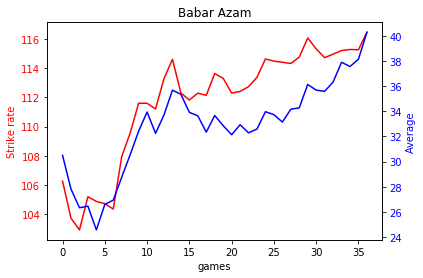

In [160]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

color = 'red'
ax1.set_xlabel('games')
ax1.set_ylabel('Strike rate', color=color)
ax1.plot(PSL_players['Babar Azam']['r_sr'][10:], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'blue'
ax2.set_ylabel('Average', color=color)  # we already handled the x-label with ax1
ax2.plot(PSL_players['Babar Azam']['r_average'][10:], color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Babar Azam')
plt.savefig('Bab_az.png',bbox_inches='tight', pad_inches=7)
plt.show()

In [165]:
import pickle
def save_obj(obj, name ):
    with open('/home/morgan/Documents/cricket/crickalytics/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
        
save_obj(PSL_players,'PSLBatsman')

In [167]:
players={}
games=0
bat=[]
for j in range(no2[0]):
    #for a in PSL[j]['info']:
     #   if a =='competition':
      #      if PSL[j]['info'][a] =='Pakistan Super League':
       #         games +=1
                for i in range(len(PSL[j]['innings'][0]['1st innings']['deliveries'])):
                    for key in PSL[j]['innings'][0]['1st innings']['deliveries'][i]:
                        if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'] not in bat:
                            bat.append(PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'])
                        if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'] in players:
                            if PSL[j]['info']['dates'] not in players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['date']:
                                players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['date'].append(PSL[j]['info']['dates'])
                            if j not in players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['games']:
                                players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['games'].append(j)
                            players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['runs'] = players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['runs'] + PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman']
                            if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['extras'] != 0:
                                for extra in PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['extras']:
                                    if extra != 'wides' or 'no ball':
                                        players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] = players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                            else:
                                players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] = players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                            if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'] == 6:
                                players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['sixes'] = players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['sixes'] + 1
                            for w in PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]:
                                if w == 'wicket':
                                    if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out'] in players:
                                        players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['dissmisals'] += 1
                                    else:
                                        players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']] = {'runs': 0,'r_runs':[], 'balls': 0,'r_balls':[], 'sixes': 0, 'dissmisals':1,'games':[j],'r_sr':[],'date':[PSL[j]['info']['dates']],'r_dissmislas':[]}
                        else:
                            players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']] = {'runs': PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'],'r_runs':[], 'balls': 1, 'r_balls':[], 'sixes': 0, 'dissmisals':0,'games':[j],'r_sr':[],'date':[PSL[j]['info']['dates']],'r_dissmislas':[]}
                for i in range(len(PSL[j]['innings'][1]['2nd innings']['deliveries'])):
                    for key in PSL[j]['innings'][1]['2nd innings']['deliveries'][i]:
                        if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman'] not in bat:
                            bat.append(PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman'])
                        if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman'] in players:
                            if PSL[j]['info']['dates'] not in players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['date']:
                                players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['date'].append(PSL[j]['info']['dates']) 
                            if j not in players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['games']:
                                players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['games'].append(j)
                            players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['runs'] = players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['runs'] + PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman']
                            if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['extras'] != 0:
                                for extra in PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['extras']:
                                    if extra != 'wides' or 'no ball':
                                        players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] = players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                            else:
                                players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] = players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                            if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman'] == 6:
                                players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['sixes'] = players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['sixes'] + 1
                            for w in PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]:
                                if w == 'wicket':
                                    if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out'] in players:
                                        players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['dissmisals'] += 1
                                    else:
                                        players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']] = {'runs': 0,'r_runs':[], 'balls': 0,'r_balls':[], 'sixes': 0, 'dissmisals':1,'games':[j],'r_sr':[],'date':[PSL[j]['info']['dates']],'r_dissmislas':[]}
                        else:
                            players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']] = {'runs': PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman'],'r_runs':[], 'balls': 1,'r_balls':[], 'sixes': 0, 'dissmisals':0,'games':[j],'r_sr':[],'date':[PSL[j]['info']['dates']],'r_dissmislas':[]}
                for i in bat:
                    players[i]['r_runs'].append(players[i]['runs'])
                    players[i]['r_balls'].append(players[i]['balls'])
                    players[i]['r_dissmislas'].append(players[i]['dissmisals'])
                bat=[]

In [168]:
for n in range(len(no2)-1):
    #for a in PSL[no2[n]]['info']:
     #   if a =='competition':
      #      if PSL[no2[n]]['info'][a] =='Pakistan Super League':
                for i in range(len(PSL[no2[n]]['innings'][0]['1st innings']['deliveries'])):
                    for key in PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i]:
                        if PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'] not in bat:
                            bat.append(PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'])
                        if PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'] in players:
                            if PSL[no2[n]]['info']['dates'] not in players[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['date']:
                                players[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['date'].append(PSL[no2[n]]['info']['dates'])
                            if no2[n] not in players[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['games']:
                                players[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['games'].append(no2[n])
                            players[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['runs'] = players[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['runs'] + PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman']
                            if PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['extras'] != 0:
                                for extra in PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['extras']:
                                    if extra != 'wides' or 'no ball':
                                        players[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] = players[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                            else:
                                players[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] = players[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                            if PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'] == 6:
                                players[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['sixes'] = players[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['sixes'] + 1
                            for w in PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]:
                                if w == 'wicket':
                                    if PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out'] in players:
                                        players[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['dissmisals'] += 1
                                    else:
                                        players[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']] = {'runs': 0,'r_runs':[], 'balls': 0,'r_balls':[], 'sixes': 0, 'dissmisals':1,'games':[no2[n]],'r_sr':[],'date':[PSL[no2[n]]['info']['dates']],'r_dissmislas':[]}
                        else:
                            players[PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']] = {'runs': PSL[no2[n]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'],'r_runs':[], 'balls': 1, 'r_balls':[], 'sixes': 0, 'dissmisals':0,'games':[no2[n]],'r_sr':[],'date':[PSL[no2[n]]['info']['dates']],'r_dissmislas':[]}
                for i in bat:
                    players[i]['r_runs'].append(players[i]['runs'])
                    players[i]['r_balls'].append(players[i]['balls'])
                    players[i]['r_dissmislas'].append(players[i]['dissmisals'])
                bat=[]
                for j in range(no2[n]+1,no2[n+1]):
     #   for a in PSL[j]['info']:
      #      if a =='competition':
       #         if PSL[j]['info'][a] =='Pakistan Super League':
                    for i in range(len(PSL[j]['innings'][0]['1st innings']['deliveries'])):
                        for key in PSL[j]['innings'][0]['1st innings']['deliveries'][i]:
                            if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'] not in bat:
                                bat.append(PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'])
                            if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'] in players:
                                if PSL[j]['info']['dates'] not in players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['date']:
                                    players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['date'].append(PSL[j]['info']['dates'])
                                if j not in players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['games']:
                                    players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['games'].append(j)
                                players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['runs'] = players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['runs'] + PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman']
                                if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['extras'] != 0:
                                    for extra in PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['extras']:
                                        if extra != 'wides' or 'no ball':
                                            players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] = players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                                else:
                                    players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] = players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                                if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'] == 6:
                                    players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['sixes'] = players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['sixes'] + 1
                                for w in PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]:
                                    if w == 'wicket':
                                        if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out'] in players:
                                            players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['dissmisals'] += 1
                                        else:
                                            players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']] = {'runs': 0,'r_runs':[], 'balls': 0,'r_balls':[], 'sixes': 0, 'dissmisals':1,'games':[j],'r_sr':[],'date':[PSL[j]['info']['dates']],'r_dissmislas':[]}
                            else:
                                players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']] = {'runs': PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'],'r_runs':[], 'balls': 1, 'r_balls':[], 'sixes': 0, 'dissmisals':0,'games':[j],'r_sr':[],'date':[PSL[j]['info']['dates']],'r_dissmislas':[]}
                    for i in range(len(PSL[j]['innings'][1]['2nd innings']['deliveries'])):
                        for key in PSL[j]['innings'][1]['2nd innings']['deliveries'][i]:
                            if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman'] not in bat:
                                bat.append(PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman'])
                            if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman'] in players:
                                if PSL[j]['info']['dates'] not in players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['date']:
                                    players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['date'].append(PSL[j]['info']['dates']) 
                                if j not in players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['games']:
                                    players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['games'].append(j)
                                players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['runs'] = players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['runs'] + PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman']
                                if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['extras'] != 0:
                                    for extra in PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['extras']:
                                        if extra != 'wides' or 'no ball':
                                            players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] = players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                                else:
                                    players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] = players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                                if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman'] == 6:
                                    players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['sixes'] = players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['sixes'] + 1
                                for w in PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]:
                                    if w == 'wicket':
                                        if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out'] in players:
                                            players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['dissmisals'] += 1
                                        else:
                                            players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']] = {'runs': 0,'r_runs':[], 'balls': 0,'r_balls':[], 'sixes': 0, 'dissmisals':1,'games':[j],'r_sr':[],'date':[PSL[j]['info']['dates']],'r_dissmislas':[]}
                            else:
                                players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']] = {'runs': PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman'],'r_runs':[], 'balls': 1,'r_balls':[], 'sixes': 0, 'dissmisals':0,'games':[j],'r_sr':[],'date':[PSL[j]['info']['dates']],'r_dissmislas':[]}
                    for i in bat:
                        players[i]['r_runs'].append(players[i]['runs'])
                        players[i]['r_balls'].append(players[i]['balls'])
                        players[i]['r_dissmislas'].append(players[i]['dissmisals'])
                    bat=[]

In [169]:
#for a in PSL[no2[-1]]['info']:
   # if a =='competition':
    #    if PSL[no2[-1]]['info'][a] =='Pakistan Super League':
for i in range(len(PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'])):
    for key in PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i]:
        if PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'] not in bat:
            bat.append(PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'])
        if PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'] in players:
            if PSL[no2[-1]]['info']['dates'] not in players[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['date']:
                players[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['date'].append(PSL[no2[-1]]['info']['dates'])
            if no2[-1] not in players[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['games']:
                players[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['games'].append(no2[-1])
            players[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['runs'] = players[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['runs'] + PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman']
            if PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['extras'] != 0:
                for extra in PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['extras']:
                    if extra != 'wides' or 'no ball':
                        players[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] = players[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] + 1
            else:
                players[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] = players[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] + 1
            if PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'] == 6:
                players[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['sixes'] = players[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['sixes'] + 1
            for w in PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]:
                if w == 'wicket':
                    if PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out'] in players:
                        players[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['dissmisals'] += 1
                    else:
                        players[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']] = {'runs': 0,'r_runs':[], 'balls': 0,'r_balls':[], 'sixes': 0, 'dissmisals':1,'games':[no2[-1]],'r_sr':[],'date':[PSL[no2[-1]]['info']['dates']],'r_dissmisals':[]}
        else:
            players[PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']] = {'runs': PSL[no2[-1]]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'],'r_runs':[], 'balls': 1, 'r_balls':[], 'sixes': 0, 'dissmisals':0,'games':[no2[-1]],'r_sr':[],'date':[PSL[no2[-1]]['info']['dates']],'r_dissmisals':[]}
for i in bat:
    players[i]['r_runs'].append(players[i]['runs'])
    players[i]['r_balls'].append(players[i]['balls'])
    players[i]['r_dissmislas'].append(players[i]['dissmisals'])
bat=[]

In [170]:
for j in range(no2[-1]+1,len(PSL)):
  #  for a in PSL[j]['info']:
   #     if a =='competition':
    #        if PSL[j]['info'][a] =='Pakistan Super League':
                for i in range(len(PSL[j]['innings'][0]['1st innings']['deliveries'])):
                    for key in PSL[j]['innings'][0]['1st innings']['deliveries'][i]:
                        if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'] not in bat:
                            bat.append(PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'])
                        if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman'] in players:
                            if PSL[j]['info']['dates'] not in players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['date']:
                                players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['date'].append(PSL[j]['info']['dates'])
                            if j not in players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['games']:
                                players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['games'].append(j)
                            players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['runs'] = players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['runs'] + PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman']
                            if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['extras'] != 0:
                                for extra in PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['extras']:
                                    if extra != 'wides' or 'no ball':
                                        players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] = players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                            else:
                                players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] = players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                            if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'] == 6:
                                players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['sixes'] = players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']]['sixes'] + 1
                            for w in PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]:
                                if w == 'wicket':
                                    if PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out'] in players:
                                        players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']]['dissmisals'] += 1
                                    else:
                                        players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key][w]['player_out']] = {'runs': 0,'r_runs':[], 'balls': 0,'r_balls':[], 'sixes': 0, 'dissmisals':1,'games':[j],'r_sr':[],'date':[PSL[j]['info']['dates']],'r_dissmislas':[]}
                        else:
                            players[PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['batsman']] = {'runs': PSL[j]['innings'][0]['1st innings']['deliveries'][i][key]['runs']['batsman'],'r_runs':[], 'balls': 1, 'r_balls':[], 'sixes': 0, 'dissmisals':0,'games':[j],'r_sr':[],'date':[PSL[j]['info']['dates']],'r_dissmislas':[]}
                for i in range(len(PSL[j]['innings'][1]['2nd innings']['deliveries'])):
                    for key in PSL[j]['innings'][1]['2nd innings']['deliveries'][i]:
                        if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman'] not in bat:
                            bat.append(PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman'])
                        if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman'] in players:
                            if PSL[j]['info']['dates'] not in players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['date']:
                                players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['date'].append(PSL[j]['info']['dates']) 
                            if j not in players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['games']:
                                players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['games'].append(j)
                            players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['runs'] = players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['runs'] + PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman']
                            if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['extras'] != 0:
                                for extra in PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['extras']:
                                    if extra != 'wides' or 'no ball':
                                        players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] = players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                            else:
                                players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] = players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['balls'] + 1
                            if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman'] == 6:
                                players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['sixes'] = players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']]['sixes'] + 1
                            for w in PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]:
                                if w == 'wicket':
                                    if PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out'] in players:
                                        players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']]['dissmisals'] += 1
                                    else:
                                        players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key][w]['player_out']] = {'runs': 0,'r_runs':[], 'balls': 0,'r_balls':[], 'sixes': 0, 'dissmisals':1,'games':[j],'r_sr':[],'date':[PSL[j]['info']['dates']],'r_dissmislas':[]}
                        else:
                            players[PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['batsman']] = {'runs': PSL[j]['innings'][1]['2nd innings']['deliveries'][i][key]['runs']['batsman'],'r_runs':[], 'balls': 1,'r_balls':[], 'sixes': 0, 'dissmisals':0,'games':[j],'r_sr':[],'date':[PSL[j]['info']['dates']],'r_dissmislas':[]}
                for i in bat:
                    players[i]['r_runs'].append(players[i]['runs'])
                    players[i]['r_balls'].append(players[i]['balls'])
                    players[i]['r_dissmislas'].append(players[i]['dissmisals'])
                bat=[]
for x in players:
    players[x]['games'] = len(players[x]['games']) 
    for i in range(len(players[x]['r_runs'])):
        players[x]['r_sr'].append(players[x]['r_runs'][i]/players[x]['r_balls'][i]*100)
        if 'r_average' in players[x]:
            if players[x]['r_dissmislas'][i] == 0:
                players[x]['r_average'].append(players[x]['r_runs'][i])
            else:
                players[x]['r_average'].append(players[x]['r_runs'][i]/players[x]['r_dissmislas'][i])
        else:
            if players[x]['r_dissmislas'][i] == 0:
                players[x]['r_average'] = [players[x]['r_runs'][i]]
            else:
                players[x]['r_average'] = [players[x]['r_runs'][i]/players[x]['r_dissmislas'][i]]
    players[x]['r_runs']=None
    players[x]['r_balls']=None
    players[x]['r_dissmislas']=None

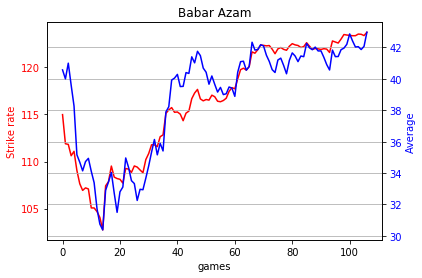

In [172]:
fig, ax1 = plt.subplots()

color = 'red'
ax1.set_xlabel('games')
ax1.set_ylabel('Strike rate', color=color)
ax1.plot(players['Babar Azam']['r_sr'][10:], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Babar Azam')
ax2 = ax1.twinx()
color = 'blue'
ax2.set_ylabel('Average', color=color)  # we already handled the x-label with ax1
ax2.plot(players['Babar Azam']['r_average'][10:], color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.grid('on')


In [173]:
save_obj(players,'Batsman')